### Company that sells clothing online and that also has in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. Note: this is an artificially created dataset


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df=pd.read_csv('Ecommerce Customers')

# General Info

In [14]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [15]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [16]:
# This correlation matrix doesn't have statistical significance
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


# EDA

In [28]:
import scipy.stats as stats

In [19]:
sns.set_style('whitegrid')

### Time On Website' VS 'Yearly Amount Spent'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


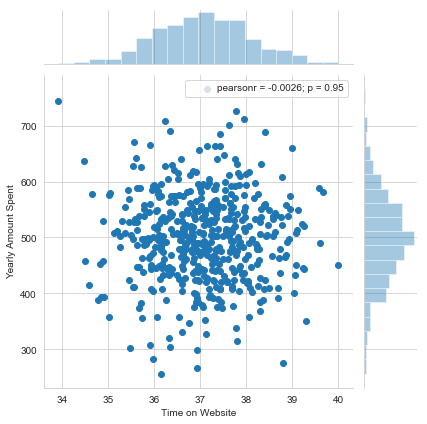

In [30]:
a = sns.jointplot(x=df['Time on Website'], y=df['Yearly Amount Spent'], data=df)
a.annotate(stats.pearsonr)

# High p-value for this parameter indicates that any correlation between 'TimeOnWebsite' and 'YearlyAmountSpent'
#is random.

### 'Time On App' VS 'Yearly Amount Spent'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


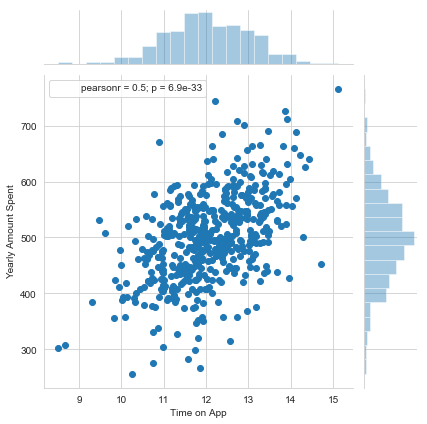

In [34]:
b = sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df)
b.annotate(stats.pearsonr)

# Low p-value indicates that the correlation between 'Time on App' an 'Yearly Amount Spent' 
# is NOT random.

### 'Time on App' VS 'Length of Membership'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


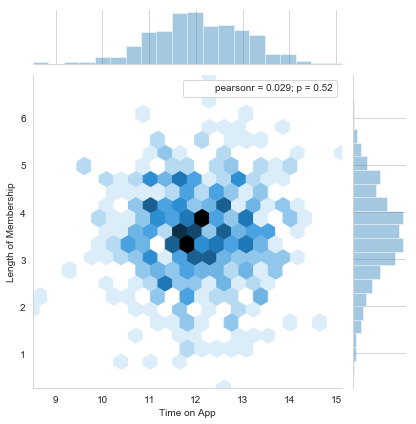

In [39]:
c = sns.jointplot(x='Time on App', y='Length of Membership', data=df, kind='hex')
c.annotate(stats.pearsonr)

# p-value is too hight, the result is not significant

### Pairplot 

In [72]:
def corrfunc(x, y, **kws):
    _, r = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(u"\u03C1 = {:.4f}".format(r), #unicode code for lowercase rho
                xy=(.1, .9), xycoords=ax.transAxes)

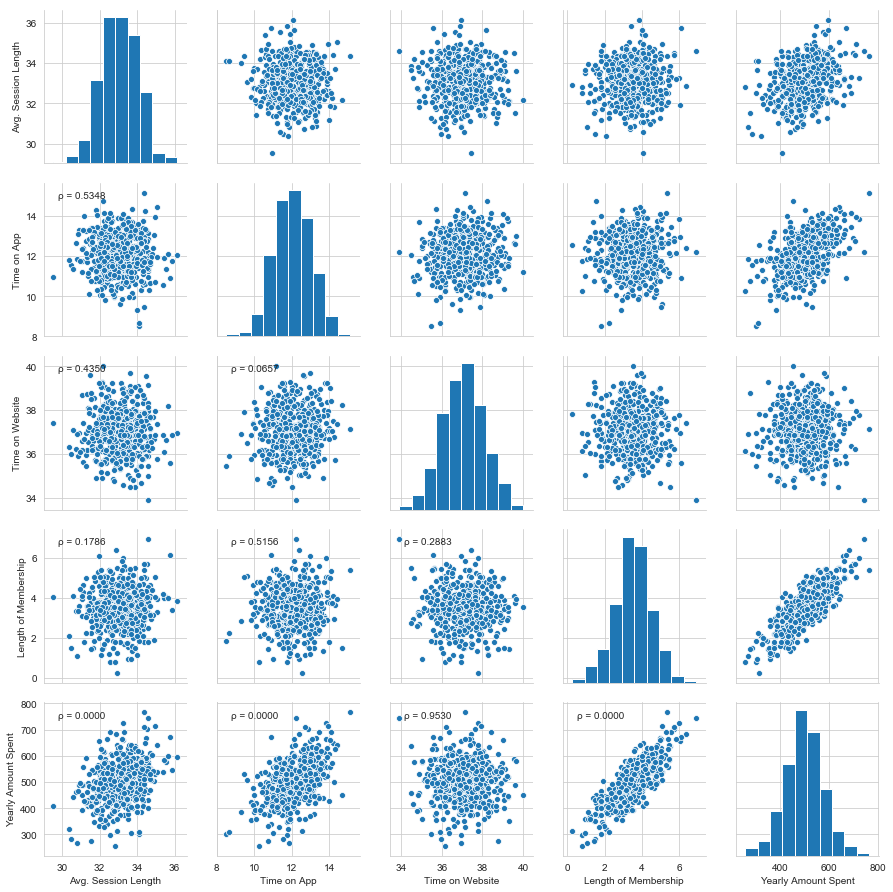

In [73]:
d = sns.pairplot(df)
d.map_lower(corrfunc)

# Observe p-values for each plot;
# 'Length of Membership' looks to be the most correlated feature with 'Yearly amount spent'

### Linear model plot of 'Length of Membership' vs 'Yearly Amount Spent'

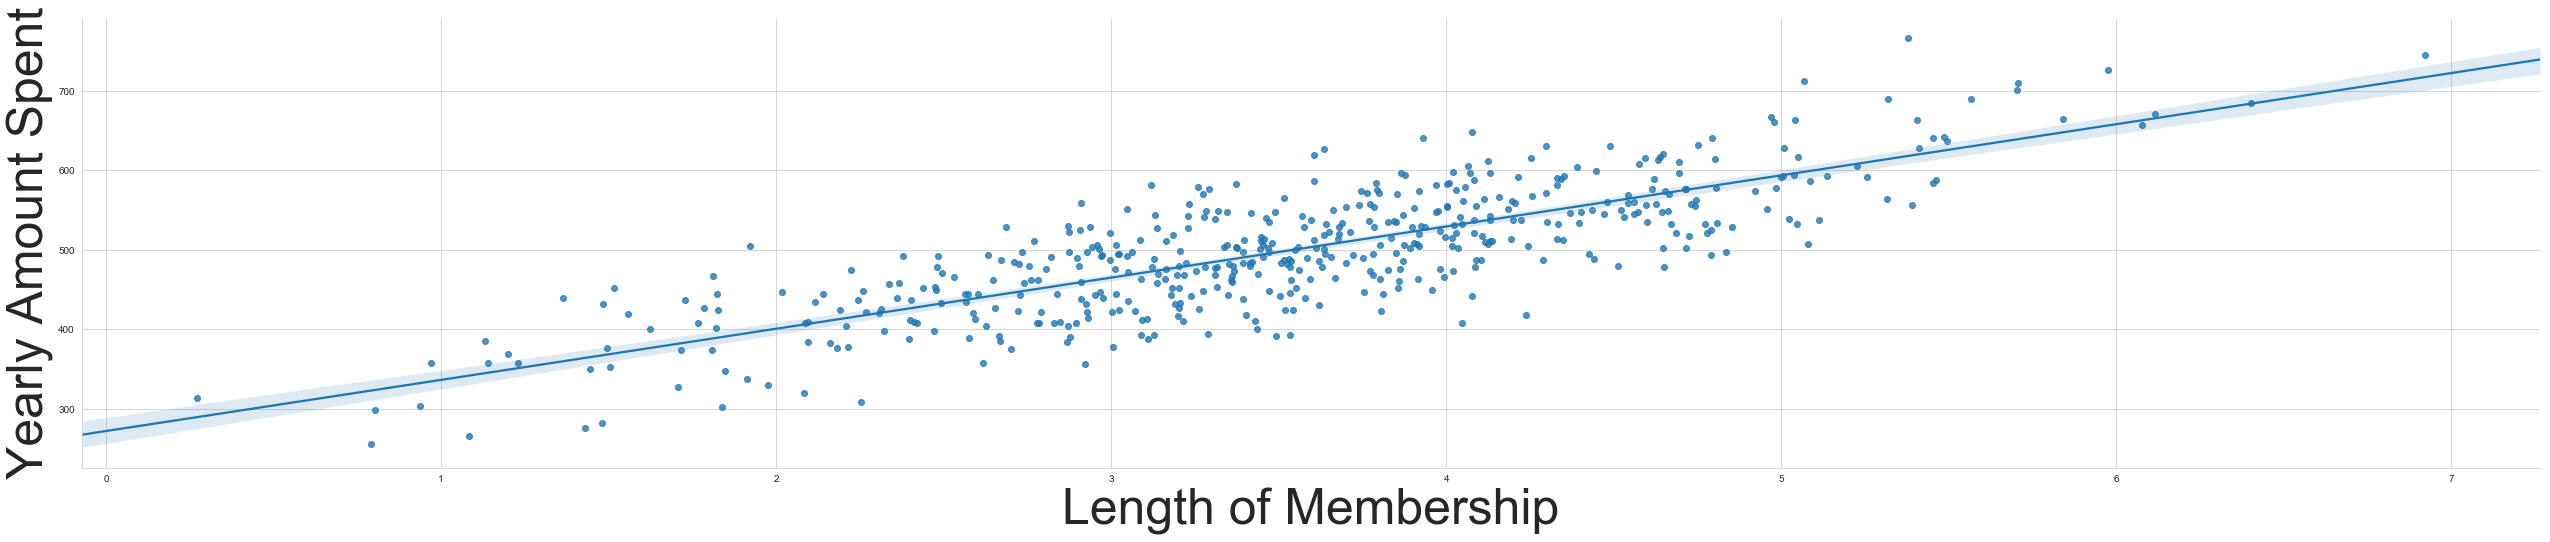

In [84]:
e = sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df,
              height = 7, aspect=5)
e.set_xlabels(label = 'Length of Membership', size=50)
e.set_ylabels(label = 'Yearly Amount Spent', size=50)

# Building a Linear Regression Model

### Train/Test split

In [86]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [87]:
y = df['Yearly Amount Spent']

In [89]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Training the model

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
# Creating an instance of LinearRegression model:
lm = LinearRegression()

In [94]:
# Train/fit on the training data:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [96]:
# Getting the coefficients of the model:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

### Predicting the Test data

In [97]:
predictions = lm.predict(X_test)

### Scatterplot of Test vs Predicted y-values

Text(0, 0.5, 'Predicted Y')

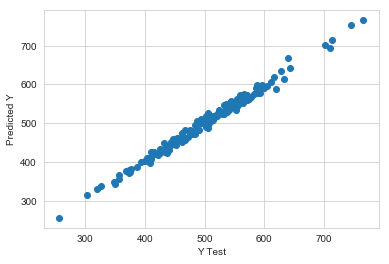

In [98]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Evaluating the model

In [100]:
from sklearn import metrics

# Mean Abs. Error
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

# Mean Squared Error
print('MSE:', metrics.mean_squared_error(y_test, predictions))

# sqrt(Mean Squared Error)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.22814865343086
MSE: 79.81305165097483
RMSE: 8.933815066978655


In [102]:
# R^2 value
print('R-Squared:', metrics.explained_variance_score(y_test, predictions))

# This model explains about 99% of the variance...

R-Squared: 0.9890771231889606


# Conclusion

In [111]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
cdf

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


If you hold all other features fixed, then 1 unit increase in:
    'Avg.Session Length' leads to the INCREASE of ~26 units of 'Yearly Amount Spent'
    'Time on App' leads to the INCREASE of 38.6 units of 'Yearly Amount Spent'
    'Time on Website' leads to the INCREASE of ~0.2 units of 'Yearly Amount Spent'
    'Lenght of Membership' leads to the INCREASE of 61.3 units of 'Yearly Amount Spent'